In [171]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
             "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
             "logged_in","num_compromised","root_shell","su_attempted","num_root",
             "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [5]:
kdd_data_set = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz'
kdd_attack_types = 'http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types'

In [6]:
df_kdd_data = pd.read_csv(kdd_data_set, header=None, names = col_names)

In [7]:
types = requests.get(kdd_attack_types)
attack_dict = {}
types_text_split = types.text.split()
for idx in range(0, len(types_text_split)):
    if idx < len(types_text_split) -1:
        attack_dict[types_text_split[idx]] = types_text_split[idx+1]
attack_dict['normal'] = 'normal'
print(attack_dict)

{'back': 'dos', 'dos': 'warezclient', 'buffer_overflow': 'u2r', 'u2r': 'satan', 'ftp_write': 'r2l', 'r2l': 'warezmaster', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'probe': 'smurf', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'normal': 'normal'}


In [139]:
df_kdd_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
# We have 4 categorical fields, and 4 binary fields. As a first step, we go around exploring the categorical variables.

In [141]:
df_kdd_data.shape

(4898431, 42)

<h2>Data Exploration </h2>

In [91]:
# Copy the data frame for repeated evaulation.
df = df_kdd_data.copy(deep=True)

In [92]:
# Identifying categorical features
numeric_cols = df._get_numeric_data().columns # gets all the numeric column names
categorical_cols = list(set(df.columns)-set(numeric_cols))
print("Categorical {}".format(categorical_cols))
print("Numerical {}".format(numeric_cols))

Categorical ['protocol_type', 'flag', 'service', 'label']
Numerical Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [93]:
# Converting the Binary Variables in to Categorical. This will help us to better understand the continuous variables.
binary_cols = []
for col in numeric_cols:
    if len(df[col].unique()) <= 2:
        result = []
        s = df[col].value_counts()
        t = float(len(df[col]))
        for v in s.index:
            result.append("{}({}%)".format(v,round(100*(s[v]/t),1)))
        print("{} - [{}]".format(col, " , ".join(result)))
        binary_cols.append(col)
# combine all categorical column names
for col in binary_cols:
    categorical_cols.append(col)

land - [0(100.0%) , 1(0.0%)]
logged_in - [0(85.6%) , 1(14.4%)]
root_shell - [0(100.0%) , 1(0.0%)]
num_outbound_cmds - [0(100.0%)]
is_host_login - [0(100.0%) , 1(0.0%)]
is_guest_login - [0(99.9%) , 1(0.1%)]


In [94]:
print("New Categorical Set {}".format(categorical_cols))

New Categorical Set ['protocol_type', 'flag', 'service', 'label', 'land', 'logged_in', 'root_shell', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']


In [95]:
numeric_features = list(set(numeric_cols)-set(categorical_cols))
print("New Numerical Set {}".format(numeric_cols))

New Numerical Set Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [96]:
def binary_classifier(train_data):
#   Converting the labels as 0 (Normal) and 1 as (Attack)
    train_data['label'][train_data['label']!='normal.'] = 'attack'  # end with .
    train_data['label'][train_data['label']=='normal.'] = 0
    train_data['label'][train_data['label']=='attack'] = 1
    train_data[['label']] = train_data[['label']].apply(pd.to_numeric)
    return train_data

In [97]:
# EDA For Categorical Data.

In [98]:
df.label.value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: label, dtype: int64

In [99]:
# The dependency variable or label feature has multiple attacks, for this project we will explore around the binary classification.
# In this analysis, we only identify if a attack can be identified based on the input features
# We represet attacks as 1 and normal as 0

In [100]:
df = binary_classifier(df)
df.head()

<ipython-input-96-1079852dd6aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'][train_data['label']!='normal.'] = 'attack'  # end with .
<ipython-input-96-1079852dd6aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'][train_data['label']=='normal.'] = 0
<ipython-input-96-1079852dd6aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['label'][train_data['label']=='attack'] = 1


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0


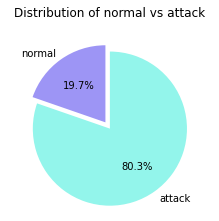

In [101]:
# Pie chart to show normal vs. attacks
colors = ["#9d95f5", "#93f5eb"]
labels = ['normal', 'attack']
sizes = [97278, 494020-97278]
explode = (0.05, 0.05)  
plt.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
plt.axis('equal')
plt.title('Distribution of normal vs attack\n')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(3,3)
plt.show()

In [102]:
# for column in categorical_cols:
#     print("------------------------------------------------------------")
#     print("Column : {}\n{}".format(column, df[column].value_counts()))
#     print("------------------------------------------------------------")


In [103]:
# Need a graph for protocol type and the label

In [104]:
# Need a grapg

In [105]:
# The above analysis yields that, columns num_outbound_cmds has only one value. On the other hand, columns service and flag 
# high cardenality ratio.  high cardenality might end up with feature too sparse, better remove those features.
# We choose to remove 'service', 'flag', num_outbound_cmds
# and keep the 'protocol_type', 'label'. 'label' will be replaced with 0 (normal), 1 (has attack) for binary classifier
# and with attack types(reduced label set) for the multi-class classifier.

In [106]:
# df.drop('service',axis = 1,inplace = True)
df.drop('flag',axis = 1,inplace = True)
df.drop('num_outbound_cmds',axis = 1,inplace = True)

In [107]:
# Converting Categorical values to numeric
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [113]:
# Converting service to continuous value
label_encoder = LabelEncoder()
df['service']= label_encoder.fit_transform(df['service'])

In [114]:
df.service.value_counts()

15    2811660
49    1100831
24     623091
54      96554
44      72653
       ...   
61          3
27          2
3           2
22          2
25          1
Name: service, Length: 70, dtype: int64

# Continuos variable analysis

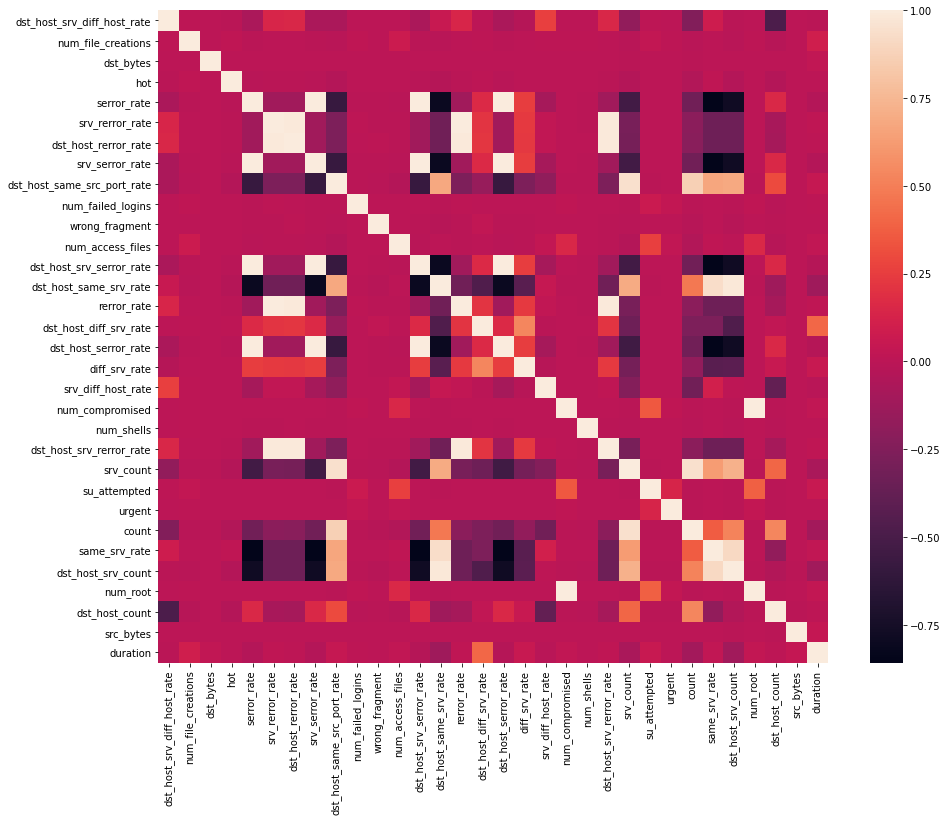

In [115]:
corr = df[numeric_features].corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [116]:
print("num_root vs num_compromised {}".format(df['num_root'].corr(df['num_compromised'])))
print("srv_serror_rate vs serror_rate{}".format(df['srv_serror_rate'].corr(df['serror_rate'])))
print("srv_count vs count {}".format(df['srv_count'].corr(df['count'])))
print("srv_rerror_rate vs rerror_rate {}".format(df['srv_rerror_rate'].corr(df['rerror_rate'])))
print("dst_host_same_srv_rate vs {} dst_host_srv_count".format(df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])))
print("dst_host_srv_serror_rate{} vs dst_host_serror_rate".format(df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])))
print("dst_host_srv_rerror_rate vs dst_host_rerror_rate{}".format(df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])))
print("dst_host_same_srv_rate vs same_srv_rate{}".format(df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])))
print("dst_host_srv_count vs same_srv_rate{}".format(df['dst_host_srv_count'].corr(df['same_srv_rate'])))
print("dst_host_same_src_port_rate vs srv_count{}".format(df['dst_host_same_src_port_rate'].corr(df['srv_count'])))
print("dst_host_serror_rate vs serror_rate {}".format(df['dst_host_serror_rate'].corr(df['serror_rate'])))
print("dst_host_serror_rate vs srv_serror_rate {}".format(df['dst_host_serror_rate'].corr(df['srv_serror_rate'])))
print("dst_host_srv_serror_rate vs serror_rate {}".format(df['dst_host_srv_serror_rate'].corr(df['serror_rate'])))
print("dst_host_srv_serror_rate vs {}".format(df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])))
print("dst_host_rerror_rate vs rerror_rate {}".format(df['dst_host_rerror_rate'].corr(df['rerror_rate'])))
print("dst_host_rerror_rate vs srv_rerror_rate {}".format(df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])))
print("dst_host_srv_rerror_rate vs rerror_rate{}".format(df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])))
print("dst_host_srv_rerror_rate vs srv_rerror_rate {}".format(df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])))

num_root vs num_compromised 0.9975798933487737
srv_serror_rate vs serror_rate0.9986924138664222
srv_count vs count 0.9433902218808042
srv_rerror_rate vs rerror_rate 0.9953719458068703
dst_host_same_srv_rate vs 0.9788464524225914 dst_host_srv_count
dst_host_srv_serror_rate0.998285955975919 vs dst_host_serror_rate
dst_host_srv_rerror_rate vs dst_host_rerror_rate0.9869790678086942
dst_host_same_srv_rate vs same_srv_rate0.9316213679073936
dst_host_srv_count vs same_srv_rate0.9075289446662882
dst_host_same_src_port_rate vs srv_count0.9473596471554561
dst_host_serror_rate vs serror_rate 0.9990059376728406
dst_host_serror_rate vs srv_serror_rate 0.9979417182527545
dst_host_srv_serror_rate vs serror_rate 0.9982509415923287
dst_host_srv_serror_rate vs 0.9993917300385466
dst_host_rerror_rate vs rerror_rate 0.9897555886509829
dst_host_rerror_rate vs srv_rerror_rate 0.9855530624565976
dst_host_srv_rerror_rate vs rerror_rate0.9859781723139902
dst_host_srv_rerror_rate vs srv_rerror_rate 0.9879088754

In [117]:
# Based on the correlation, computation we will drop columns that are highly coorelated.
df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [118]:
def multiclass_classifier(train_data):
    print("Multiclass Classifier")
    types = requests.get(kdd_attack_types)
    attack_dict = {}
    types_text_split = types.text.split()
    for idx in range(0, len(types_text_split)):
        if idx < len(types_text_split) -1:
            attack_dict[types_text_split[idx]] = types_text_split[idx+1]
    attack_dict['normal'] = 'normal'
    #   Some label values have . at the end, so just copying everything, except the last character
    train_data['label'] = train_data.label.apply(lambda x : attack_dict[x[0:-1]] )
    return train_data

# Model Execution

In [161]:
# Array for storing classifier and scores
#https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py/50671617
def generate_result_metrics(name, y_true, y_prediction):
    cnf_matrix = confusion_matrix(y_true, y_prediction)
#     print("Confusion Matrix for {} Classifier\n{}\n".format(name, cnf_matrix))
    sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap='Blues')
    #[[1 1 3]
    # [3 2 2]
    # [1 3 1]]
#     print(cnf_matrix)
    FP = cnf_matrix[0][0]  
    FN = cnf_matrix[1][0]
    TP = cnf_matrix[1][1]
    TN = cnf_matrix[0][0]


    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    result = {}
    result['Algorithm'] = name
    TPR = TP/(TP+FN)
    result['TPR'] = TPR
    print("The True Positive Rate for {} is {}".format(name, TPR))
    
    
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    result['TNR'] = TNR
    print("The True Negative Rate for {} is {}".format(name, TNR))

    
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    result['PPV'] = PPV
    print("The Precision or positive predictive value for {} is {}".format(name, PPV))
    
    # Negative predictive value
    NPV = TN/(TN+FN)
    result['NPV'] = NPV
    print("The Negative predictive value for {} is {}".format(name, NPV))
    

    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    result['FPR'] = FPR
    print("The Fall out or false positive rate {} is {}".format(name, FPR))

    # False negative rate
    FNR = FN/(TP+FN)
    result['FNR'] = FNR
    print("The False negative rate {} is {}".format(name, FNR))

    # False discovery rate
    FDR = FP/(TP+FP)
    result['FDR'] = FDR
    print("The False discovery rate {} is {}".format(name, FDR))
    

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    result['ACC'] = ACC
    print("The Overall accuracy {} is {}".format(name, ACC))
    return result
    


In [162]:
def decision_trees(train_feature, train_label, test_feature, test_label):
    clf = tree.DecisionTreeClassifier(splitter = "random", criterion = "entropy", max_depth=15)
    clf.fit(train_feature, train_label.values.ravel())
    prediction = clf.predict(test_feature)
    result = generate_result_metrics("Decision Tree", test_label, prediction)
    print("Feature Importance {}".format(clf.feature_importances_))
    return result


In [163]:
def logistic_classifier(train_feature, train_label, test_feature, test_label):
    clf = LogisticRegression(max_iter=90)
    clf.fit(train_feature, train_label.values.ravel())
    prediction = clf.predict(test_feature)
    result = generate_result_metrics("Decision Tree", test_label, prediction)
    return result


In [164]:
def random_forest_classifier(train_feature, train_label, test_feature, test_label):
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(train_feature, train_label.values.ravel())
    prediction = clf.predict(test_feature)
    result = generate_result_metrics("Decision Tree", test_label, prediction)
    print("Feature Importance {}".format(clf.feature_importances_))
    return result


In [172]:
def gaussian_naive_bayes_classifier(train_feature, train_label, test_feature, test_label):
    clf = GaussianNB()
    clf.fit(train_feature, train_label.values.ravel())
    prediction = clf.predict(test_feature)
    result = generate_result_metrics("Naive Bayes", test_label, prediction)
    return result


# Binary Classifier

In [166]:
Y = df['label']
X = df.drop(['label'], axis=1)
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
result_metric = []

(3281948, 31) (1616483, 31)
(3281948,) (1616483,)


The True Positive Rate for Decision Tree is 0.9998888427449049
The True Negative Rate for Decision Tree is 0.5
The Precision or positive predictive value for Decision Tree is 0.8014198043778333
The Negative predictive value for Decision Tree is 0.9995515485588826
The Fall out or false positive rate Decision Tree is 0.5
The False negative rate Decision Tree is 0.00011115725509509349
The False discovery rate Decision Tree is 0.19858019562216672
The Overall accuracy Decision Tree is 0.8342584639906183
Feature Importance [1.92018616e-04 2.30565477e-02 4.87094623e-02 2.17696463e-03
 5.39903568e-04 0.00000000e+00 1.20415114e-04 1.31982050e-06
 4.35207824e-03 1.14150082e-04 5.78361244e-01 7.15244280e-06
 9.11418457e-06 0.00000000e+00 7.56797909e-06 7.16585485e-06
 1.23879758e-05 0.00000000e+00 2.23876552e-05 3.14288838e-01
 8.28000064e-05 1.49211094e-03 1.04271671e-03 8.52119430e-05
 3.07169753e-05 1.24985618e-04 1.31813175e-02 1.44850784e-03
 2.51073095e-03 1.79986151e-03 6.22232227e-03]


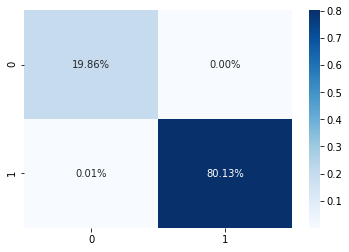

In [167]:
result_metric.append(decision_trees(X_train, Y_train, X_test, Y_test))  

c:\users\arunh\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The True Positive Rate for Decision Tree is 0.9980508884089229
The True Negative Rate for Decision Tree is 0.5
The Precision or positive predictive value for Decision Tree is 0.8015241479438943
The Negative predictive value for Decision Tree is 0.9921750556268323
The Fall out or false positive rate Decision Tree is 0.5
The False negative rate Decision Tree is 0.0019491115910771602
The False discovery rate Decision Tree is 0.1984758520561057
The Overall accuracy Decision Tree is 0.8333047488769408


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

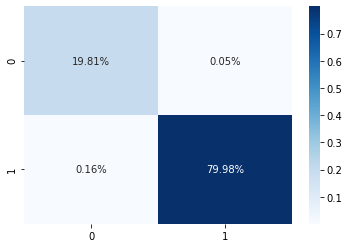

In [168]:
result_metric.append(logistic_classifier(X_train, Y_train, X_test, Y_test))

The True Positive Rate for Decision Tree is 0.9998973339241135
The True Negative Rate for Decision Tree is 0.5
The Precision or positive predictive value for Decision Tree is 0.8014117350085905
The Negative predictive value for Decision Tree is 0.9995858155851678
The Fall out or false positive rate Decision Tree is 0.5
The False negative rate Decision Tree is 0.00010266607588644052
The False discovery rate Decision Tree is 0.19858826499140944
The Overall accuracy Decision Tree is 0.834257585595704
Feature Importance [7.53719335e-03 6.52775653e-02 6.31412991e-02 2.68652828e-03
 3.52791235e-04 2.75373084e-06 4.52096132e-04 7.15406456e-07
 6.25874757e-04 2.95028024e-05 1.46906455e-01 7.56438983e-04
 5.71803664e-06 1.62982476e-06 1.21995791e-05 1.65858016e-06
 3.58917641e-06 5.31190181e-09 6.49269776e-05 2.40368836e-01
 7.89253267e-02 7.19990715e-03 4.66098450e-03 5.80481854e-02
 3.56582261e-02 1.42379507e-02 1.08490611e-01 1.08865914e-02
 6.92842269e-02 4.99179361e-02 3.44622769e-02]


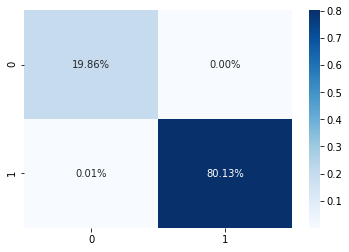

In [169]:
result_metric.append(random_forest_classifier(X_train, Y_train, X_test, Y_test))

The True Positive Rate for Naive Bayes is 0.9934973005769371
The True Negative Rate for Naive Bayes is 0.5
The Precision or positive predictive value for Naive Bayes is 0.8207799794268995
The Negative predictive value for Naive Bayes is 0.9708968295370923
The Fall out or false positive rate Naive Bayes is 0.5
The False negative rate Naive Bayes is 0.006502699423062969
The False discovery rate Naive Bayes is 0.17922002057310052
The Overall accuracy Naive Bayes is 0.8441723373099617


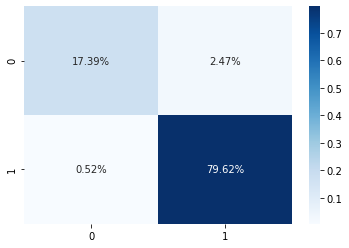

In [173]:
result_metric.append(gaussian_naive_bayes_classifier(X_train, Y_train, X_test, Y_test))

In [174]:
pd.DataFrame(result_metric)

,Algorithm,TPR,TNR,PPV,NPV,FPR,FNR,FDR,ACC
0,Decision Tree,0.999889,0.5,0.801420,0.999552,0.5,0.000111,0.198580,0.834258
1,Decision Tree,0.999897,0.5,0.801412,0.999586,0.5,0.000103,0.198588,0.834258
2,Naive Bayes,0.993497,0.5,0.820780,0.970897,0.5,0.006503,0.179220,0.844172
